![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [24]:
import pandas as pd
data = pd.read_csv("data/plants_and_bees.csv")
data

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [25]:
# Start coding here
# Group the data by "native_or_non" and "plant_species" columns and count the occurrences
plant_preference = data.groupby(["native_or_non", "plant_species"]).size().reset_index(name="count")

# Display the preferred plants for native bee species
native_preference = plant_preference[plant_preference["native_or_non"] == "native"]
print("Preferred plants for native bee species:")
print(native_preference)

# Display the preferred plants for non-native bee species
nonnative_preference = plant_preference[plant_preference["native_or_non"] == "non-native"]
print("Preferred plants for non-native bee species:")
print(nonnative_preference)

Preferred plants for native bee species:
  native_or_non             plant_species  count
0        native        Asclepias tuberosa     16
1        native  Chamaecrista fasciculata     23
2        native        Helenium flexuosum     19
3        native          Monarda punctata     11
4        native                      None    442
5        native       Penstemon digitalis     16
6        native  Pycnanthemum tenuifolium      4
7        native           Rudbeckia hirta     59
8        native         Rudbeckia triloba     13
9        native   Tradescantia virginiana      3
Preferred plants for non-native bee species:
   native_or_non          plant_species  count
10    non-native   Agastache foeniculum      5
11    non-native      Cichorium intybus     25
12    non-native        Coronilla varia     14
13    non-native      Cosmos bipinnatus      9
14    non-native          Daucus carota     33
15    non-native   Leucanthemum vulgare    105
16    non-native     Lobularia maritima      5

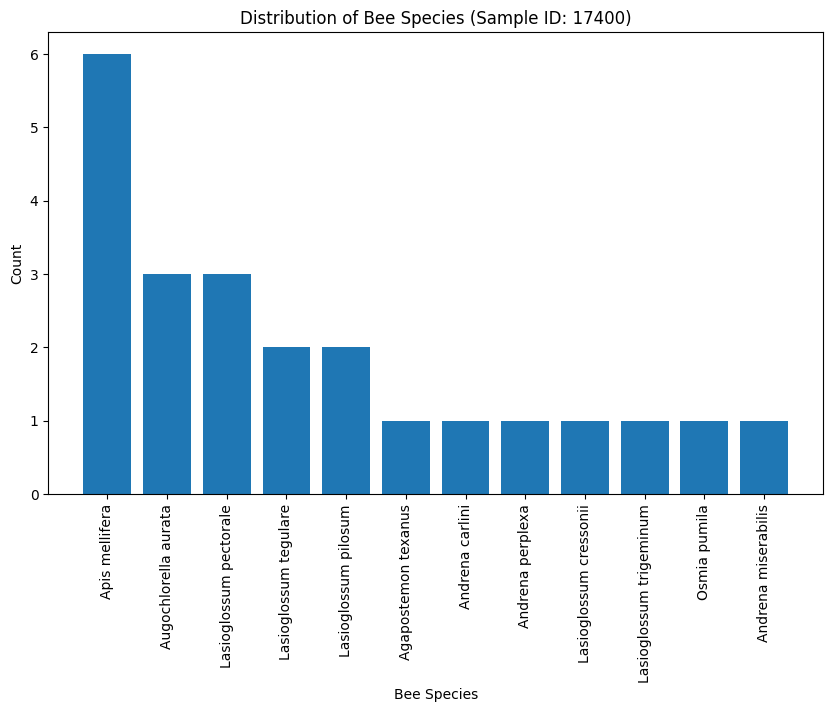

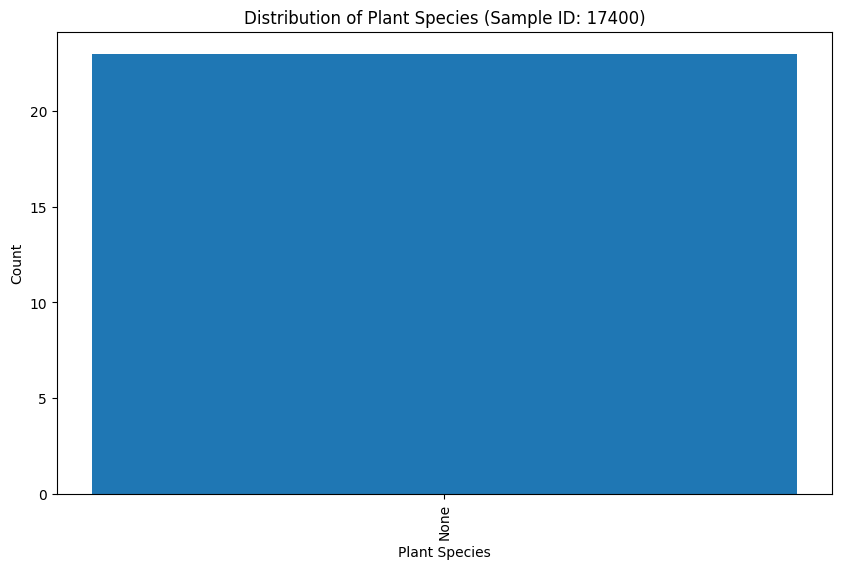

In [26]:
import matplotlib.pyplot as plt

# Choose a specific sample (e.g., sample_id = 0)
sample_id = 17400
sample_data = data[data["sample_id"] == sample_id]

# Count the occurrences of each bee and plant species in the sample
bee_species_counts = sample_data["bee_species"].value_counts()
plant_species_counts = sample_data["plant_species"].value_counts()

# Create a bar plot for the bee species
plt.figure(figsize=(10, 6))
plt.bar(bee_species_counts.index, bee_species_counts.values)
plt.xlabel("Bee Species")
plt.ylabel("Count")
plt.title("Distribution of Bee Species (Sample ID: {})".format(sample_id))
plt.xticks(rotation=90)
plt.show()

# Create a bar plot for the plant species
plt.figure(figsize=(10, 6))
plt.bar(plant_species_counts.index, plant_species_counts.values)
plt.xlabel("Plant Species")
plt.ylabel("Count")
plt.title("Distribution of Plant Species (Sample ID: {})".format(sample_id))
plt.xticks(rotation=90)
plt.show()

Top three plant species to support native bees


In [28]:
# Filter the data for native bee species
native_bees = data[data["native_or_non"] == "native"]

# Calculate the total number of bees associated with each plant species
plant_bee_counts = native_bees.groupby("plant_species")["bees_num"].sum().reset_index(name="total_bees")

# Select the top three plant species with the highest bee counts
top_three_plants = plant_bee_counts.nlargest(3, "total_bees")

# Display the top three plant species and the corresponding number of bees
print("Top three plant species to support native bees:")
for index, row in top_three_plants.iterrows():
    plant_species = row["plant_species"]
    total_bees = row["total_bees"]
    print("Plant species: {}, Total bees: {}".format(plant_species, total_bees))

Top three plant species to support native bees:
Plant species: None, Total bees: 13825
Plant species: Rudbeckia hirta, Total bees: 947
Plant species: Asclepias tuberosa, Total bees: 174
